# Modulação Digital em Canal com Desvanecimento 

## Objetivos
As metas desse tutorial são:

- Dar continuidade aos conhecimentos de Modulação Digital adquiridos no tutorial passado;
- Apresentar os modelos de canais Rayleigh e Rice;
- Traçar e analisar a curva BER vs. $\frac{E_{b}}{N_{o}}$ para os dois canais;
- Visualizar a diferença de desempenho entre os canais Rayleigh e AWGN;
- Visualizar o desempenho do canal Rice com ruído gaussiano (AWGN);

## Modelos de desvanecimento

Em um canal de comunicação sem fio, o sinal viaja do transmissor ao receptor, passando por obstruções e sendo refletido nos obstáculos. Isso dá origem a variações em amplitude, fase e ângulo de chegada no sinal recebido, e como citado no tutorial anterior (Hands-On 11): o desvanecimento possui duas categorias: larga escala, ou sombreamento, e múltiplos percursos, ou pequena escala. 

Para prever os efeitos do desvanecimento, e assim tentar suavizá-los, é necessário modelar matematicamente este fenômeno. Alguns dos modelos utilizados para modelar o desvanecimento por multipercursos são:
- Modelo Rayleigh
- Modelo de Rice, ou Riciano
- Modelo de Nakagami
- Modelo de Weibull

## Desvanecimento Rayleigh

Supondo um grande número de percursos (aleatórios), podemos aplicar o teorema do limite central para modelar a reposta ao impulso - variante no tempo - como um processo aleatório Gaussiano, com valores complexos. Uma vez que a distribuição - no conjunto complexo - está centrada no zero, dizemos que o canal está modelado pelo desvanecimento Rayleigh, ou canal Rayleigh. 

Considerando que o modelo só tem duas componentes, por exemplo, $X(t)$ e $Y(t)$, podemos obter o desvanecimento Rayleigh apenas adicionando estas duas variáveis aleatórias gaussianas e extraindo a raiz quadrada (envelope) do resultado. 

Definamos a variável Gaussiana complexa como:

$$ Z = X +jY $$

O envelope $R$ desta variável é dada pelo seu módulo:

$$ R = \sqrt{X^2 + Y^2} $$

A fase, por sua vez:

$$ \phi = tan^{-1}(\frac{Y}{X}) $$


\\perguntar a Vicente se é interessante colocar os experimentos da seção 5.6

## Desempenho da modulação digital (BPSK) em canal Rayleigh

Primeiramente, será analisado o caso da detecção não coerente do sinal em canal Rayleigh, com ruído Gaussiano adicionado. Após isso, trataremos da detecção coerente, mas em ambos os casos será considerado um desvanecimento plano Rayleigh representado por uma resposta ao impulso $h$ complexa. 

O sinal recebido pode ser representado por:

$$ y = hx + n $$

Onde $x$ é o sinal transmitido e $n$ é o ruído AWGN. Supondo que não houvesse desvanecimento, essa equação seria $y=x+n$. 

\\ como devo tratar a detecção coerente e não-coerente?

## Prática 1: Comparação de performance dos canais Rayleigh e AWGN através da curva BER vs. Eb/No

A definição da taxa de erro de bits (BER), para a modulação BPSK em um desvanecimento Rayleigh é dada por:

$$ P_{b} = \frac{1}{2}(1-\sqrt{\frac{E_{b}/N_{o}}{1+E_{b}/N_{o}}})$$

Devemos também gerar a curva da BER para o canal AWGN:

$$ P_{b} = \frac{1}{2}erfc(\sqrt{E_{b}/N_{o}}) $$

O seguinte esquema de simulação é utilizado para o esquema BPSK com canal Rayleigh, em comparação com o canal AWGN: 

\ figura pendente (fazer no power point) 


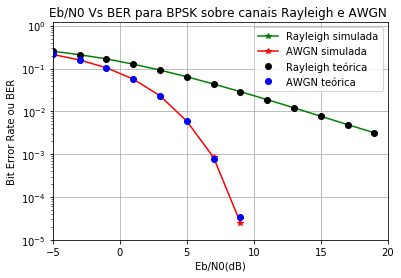

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import erfc

N = 10**6 #número de símbolos BPSK a serem transmitidos

d = np.random.rand(N) > 0.5 # dados binários 
x = 2*d -1 #simbologia: 0 representado por -1 e 1 representado por 1

EbN0dB = np.arange(-5,20,2) #sequência de valores Eb/n0 

BER_rayleigh_simulada = np.zeros(len(EbN0dB))
BER_awgn_simulada = np.zeros(len(EbN0dB))

for i in range(len(EbN0dB)):
    noise = 1/np.sqrt(2)*(np.random.randn(N)+1j*np.random.randn(N)) #ruído AWGN com média 0 e variância 1
    h = 1/np.sqrt(2)*(np.random.randn(N)+1j*np.random.randn(N))#fator de desvanecimento plano Rayleigh (single tap?)
    n = noise*10**(-EbN0dB[i]/20) # conversão de escala: dB para linear 
    y_awgn = x + n 
    y_rayleigh = h*x + n
    
    #receptor coerente para o canal Rayleigh:
    y_rayleigh_cap=y_rayleigh/h #supondo uma resposta ao impulso h conhecida
    r_rayleigh = np.real(y_rayleigh_cap)>0 #os símbolos positivos recebidos são 1, os demais são 0 (lembrar da simbologia)
    
    #receptor para o canal AWGN
    r_awgn = np.real(y_awgn)>0 
    BER_rayleigh_simulada[i] = np.sum(np.bitwise_xor(d,r_rayleigh))
    BER_awgn_simulada[i] = np.sum(np.bitwise_xor(d,r_awgn))

BER_rayleigh_simulada /= N #divisão do próprio vetor pelo número de dados binários
BER_awgn_simulada /= N

#BER Teórica:

EbN0=10**(EbN0dB/10) #Eb/N0 em escala linear

BER_rayleigh_teorica = 0.5*(1-np.sqrt(EbN0/(1+EbN0))) #vide as equações enunciadas
BER_awgn_teorica = 0.5*erfc(np.sqrt(EbN0))

plt.figure()
plt.semilogy(EbN0dB,BER_rayleigh_simulada,'g-*')
plt.semilogy(EbN0dB,BER_awgn_simulada,'r-*')
plt.semilogy(EbN0dB,BER_rayleigh_teorica,'ko')
plt.semilogy(EbN0dB,BER_awgn_teorica,'bo')

plt.grid()
plt.axis([-5,20,10**(-5),1.2])
plt.legend(['Rayleigh simulada','AWGN simulada','Rayleigh teórica','AWGN teórica'])
plt.title("Eb/N0 Vs BER para BPSK sobre canais Rayleigh e AWGN ")
plt.xlabel('Eb/N0(dB)')
plt.ylabel('Bit Error Rate ou BER')

plt.show()

## Desvanecimento Rice

## Desempenho da modulação digital (BPSK) em canal Rice


## Prática 2: visualização das curvas BER vs. Eb/No do canal Rice

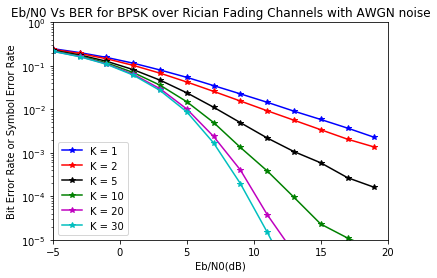

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#Dados iniciais
N=10**6 #Number of data samples to send across the Rician Channel
EbN0dB= np.arange(-5,20,2) #Eb/N0 in dB overwhich the performance has to be simulated
totPower=1 # Total power of LOS path & scattered paths
K=np.array([1,2,5,10,20,30]) #lista dos fatores K ricianos

d=np.random.rand(N)>0.5 #data generation
x=2*d-1 #modulação BPSK (simbologia: 1 : 1, 0 : -1) 
simBER_ricean=np.zeros(len(EbN0dB))
plotStyle=['b*-','r*-','k*-','g*-','m*-','c*-']
legendas = []
for index in range(len(K)):
    k=K[index]
    #Derive non-centrality parameter and sigma for the underlying
    #valores aleatórios gaussianos para gerar a envoltória Riciana
    s=np.sqrt(k/(k+1)*totPower) #Parâmetro de não centralidade
    sigma=totPower/np.sqrt(2*(k+1))
    for i in range(len(EbN0dB)):
        noise=1/np.sqrt(2)*(np.random.randn(N)+1j*np.random.randn(N)) #ruído AWGN com média=0 var=1
        h=((sigma*np.random.randn(N)+s)+1j*(np.random.randn(N)*sigma+0)) #Desvanecimento Rice - single tap
        n = noise*10**(-EbN0dB[i]/20) #conversão de dB para linear
        y_ricean=h*x+n #sinal recebido pelo canal Rice
        #receptor coerente para canal Rice
        y_ricean_cap=y_ricean/h #Assuming that h is known at the signal accurately
        r_ricean=np.real(y_ricean_cap)>0 #received symbols = 1 is real part > 0 or else it is 0
        #receptor para AWGN channel
        simBER_ricean[i]=np.sum(np.bitwise_xor(d,r_ricean))
    simBER_ricean=simBER_ricean/N
    #BER simulada
    EbN0=10**(EbN0dB/10) #Eb/N0 in Linear Scale
    plt.semilogy(EbN0dB,simBER_ricean,plotStyle[index])
    legendas.append('K = ' +str(K[index]))

plt.axis([-5,20,10**(-5),10**0])
plt.legend(legendas)
plt.title('Eb/N0 Vs BER for BPSK over Rician Fading Channels with AWGN noise')
plt.xlabel('Eb/N0(dB)')
plt.ylabel('Bit Error Rate or Symbol Error Rate')

plt.show()